In [1]:
from pathlib import Path
import sys

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

import scipy.sparse as sparse
from scipy import stats
from scipy.stats import mstats
import seaborn as sns
from Bio.SeqFeature import FeatureLocation
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio.Seq import Seq

from math import log,exp,inf

import logomaker as lm
import Bio.motifs as motifs
import re

import operator

sys.path.append('../../bitome2')
sys.path.append('../')
sys.path.append('../../bitome2_workflows/DnaFeaturesViewer-master/')


from bitome.core import Bitome
from feature_functions import *

In [4]:
# K12 MG1655 Genebank

K12_DATA_PATH = Path('../data/bitome2/mg1655')

In [5]:
# from GenBank annotation
origin = (3925743, 3925975)
# from 1. Duggin, I. G. & Bell, S. D. J. Mol. Biol. (2009). with the following terA/terC sequences:
# ter_a = 'AATTAGTATGTTGTAACTAAAGT'
# ter_c = 'ATATAGGATGTTGTAACTAATAT'
terminus = (1341745, 1609180)
cid_boundaries = [50000, 142779, 223485, 446815, 927474, 985894, 1080000, 1195008, 1301085, 1577657,
                 1799393, 1852621, 2102875, 2259719, 2380722, 2533498, 2726069, 2905711, 2996372, 3297098,
                 3423423, 3440040, 3652182, 3811250, 3941516, 4035239, 4166484, 4470986]

In [6]:
mg1655 = Bitome(
    Path(K12_DATA_PATH, 'NC_000913.3.gb'),
    name='MG1655',
    origin=origin, terminus=terminus,
    cid_boundaries=cid_boundaries,
    gene_table=Path(K12_DATA_PATH, 'gene_info_supp.csv'),
    tu_table=Path(K12_DATA_PATH, 'tu.csv'),
    operon_table=Path(K12_DATA_PATH, 'operon.csv'),
    tss_table=Path(K12_DATA_PATH, 'tss.csv'),
    # TODO PARSE TTS data
    tts_table=None,
    tfbs_table=Path(K12_DATA_PATH, 'tfbs.csv'),
    terminator_table=Path(K12_DATA_PATH, 'terminator.csv'),
    attenuator_table=Path(K12_DATA_PATH, 'attenuator.csv'),
    rbs_table=Path(K12_DATA_PATH, 'rbs.csv'),
    riboswitch_table=Path(K12_DATA_PATH, 'riboswitch.csv')
)

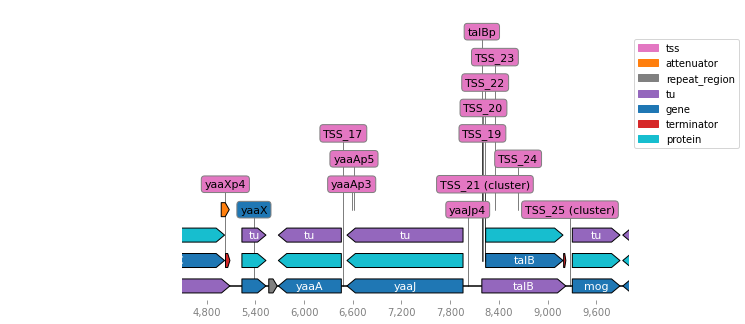

In [7]:
mg1655.view_region(4500, 10000)

In [ ]:
precise2 - load_

In [10]:
# import TFBS SNPs

tfbs_snp_df = pd.read_csv('tfbs_snp_df.csv')
tfbs_snp_df

,Unnamed: 0,Unnamed: 0.1,exp,ale,flask,isolate,tech_rep,presence,Reference Seq,Position,...,Details,Sequence Change,Gene,coding,organism,left,right,tf,snp_per_tf,dist_to_left
0,6019,109,TOL_hexamethylenediamine,4,50,3,1,1.00,NC_000913,940856,...,intergenic (+136/‑103),A→G,serS/dmsA,False,Escherichia coli,940850,940862,IHF,24.0,6
1,3573,323,CCK_pgi,3,9,0,1,0.20,NC_000913,816792,...,intergenic (‑145/‑252),C→A,ybhK/moaA,False,Escherichia coli,816781,816794,FNR,3.0,11
2,5973,54,TOL_adipic_acid,5,50,2,1,1.00,NC_000913,1842229,...,intergenic (‑94/‑142),T→G,ynjH/gdhA,False,Escherichia coli,1842220,1842234,Nac,1.0,9
3,5291,27,HOT,16,48,0,1,0.21,NC_000913,3059703,...,intergenic (‑2/‑50),A→T,yqfE/argP,False,Escherichia coli,3059694,3059712,PhoB,14.0,9
4,5292,28,HOT,16,48,0,1,0.21,NC_000913,3059704,...,intergenic (‑3/‑49),A→T,yqfE/argP,False,Escherichia coli,3059694,3059712,PhoB,14.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,5949,182,TOL_adipic_acid,1,50,1,1,1.00,NC_000913,4294366,...,intergenic (+227/‑115),A→T,nrfG/gltP,False,Escherichia coli,4294365,4294382,NaN,NaN,1
941,5590,196,ILT_mg1655,4,84,10,1,1.00,NC_000913,4222743,...,intergenic (‑256/+61),C→T,arpA/iclR,False,Escherichia coli,4222735,4222750,NaN,NaN,8
942,3667,153,ECNR2.1,10,1,1,1,1.00,NC_000913,638619,...,intergenic (‑46/‑326),A→G,dsbG/ahpC,False,Escherichia coli,638611,638630,NaN,NaN,8
943,5966,277,TOL_adipic_acid,5,50,1,1,1.00,NC_000913,1404625,...,intergenic (‑60/‑116),A→C,abgA/abgR,False,Escherichia coli,1404611,1404628,NaN,NaN,14
